**Initialization**
* I use these 3 lines of code on top of my each Notebooks because it will help to prevent any problems while reloading and reworking on a same Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [1]:
#@ Initialization:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Downloading the Dependencies**
* I have downloaded all the Libraries and Dependencies required for this Project in one particular cell.

In [37]:
#@ Downloading the Libraries and Dependencies:
import sys, os, tarfile, urllib.request
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#@ Visualization Dependencies:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR = "."
ID = "California Housing"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", ID)
if not os.path.isdir(IMAGE_PATH):
    os.makedirs(IMAGE_PATH)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
  print("Saving Figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

#@ Ignoring the Warnings:
import warnings
warnings.filterwarnings(action="ignore", message="^ internal")

In [3]:
#@ Downloading the Dependencies:
# !pip install sweetviz
# import sweetviz as sv
import IPython

**Getting the Data**
* I have used Google Colab for this Project so the process of downloading and reading the Data might be different in other platforms. I will use **California Housing Prices** Dataset from the StatLib Repository for this Project. This Dataset was based on Data from the 1990 California Census. The Data has metrics such as Population, Median Income, Median House Price and so on for each block group in California. I will build a Model of Housing Prices in California using the California Census Dataset.

In [4]:
#@ Getting the Data:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data()                                                           # Initializing the Function.

#@ Getting the Data:
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

#@ Inspecting the Data:
housing = load_housing_data()
housing.head(7)                                                                # Inspecting the Data.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [5]:
#@ Analyzing the DataFrame using Sweetviz:
# report = sv.analyze(housing)
# IPython.display.HTML("SWEETVIZ_REPORT.html")

### **Exploratory Data Analysis**
* The analysis report presents that the DataFrame has 20640 rows and each row represents one district. The report also presents that the DataFrame has 10 features where one is categorical and 9 are numerical. The info method is standard and useful to get the quick description of the Data, in particular the attributes type and the number of non null values. 

In [6]:
#@ Exploratory Data Analysis:
housing.info()                  # Inspecting the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Exploratory Data Analysis**
* The total bedrooms attribute has only 20433 non null values which means that 207 districts are missing here. The ocean proximity attribute is of object Data type and the values in this attribute is repetitive which means that it is probably categorical attribute. The value counts method can be used to find the categories and number of districts belonging to a particular category. The describe method shows the summary of the numerical attributes.

In [7]:
#@ Exploratory Data Analysis:
print(housing["ocean_proximity"].value_counts())          # Inspecting the Categorical Attribute.
print("\n")
IPython.display.display(housing.describe())               # Inspecting the Numerical Attributes. 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving Figure Histogram Plots


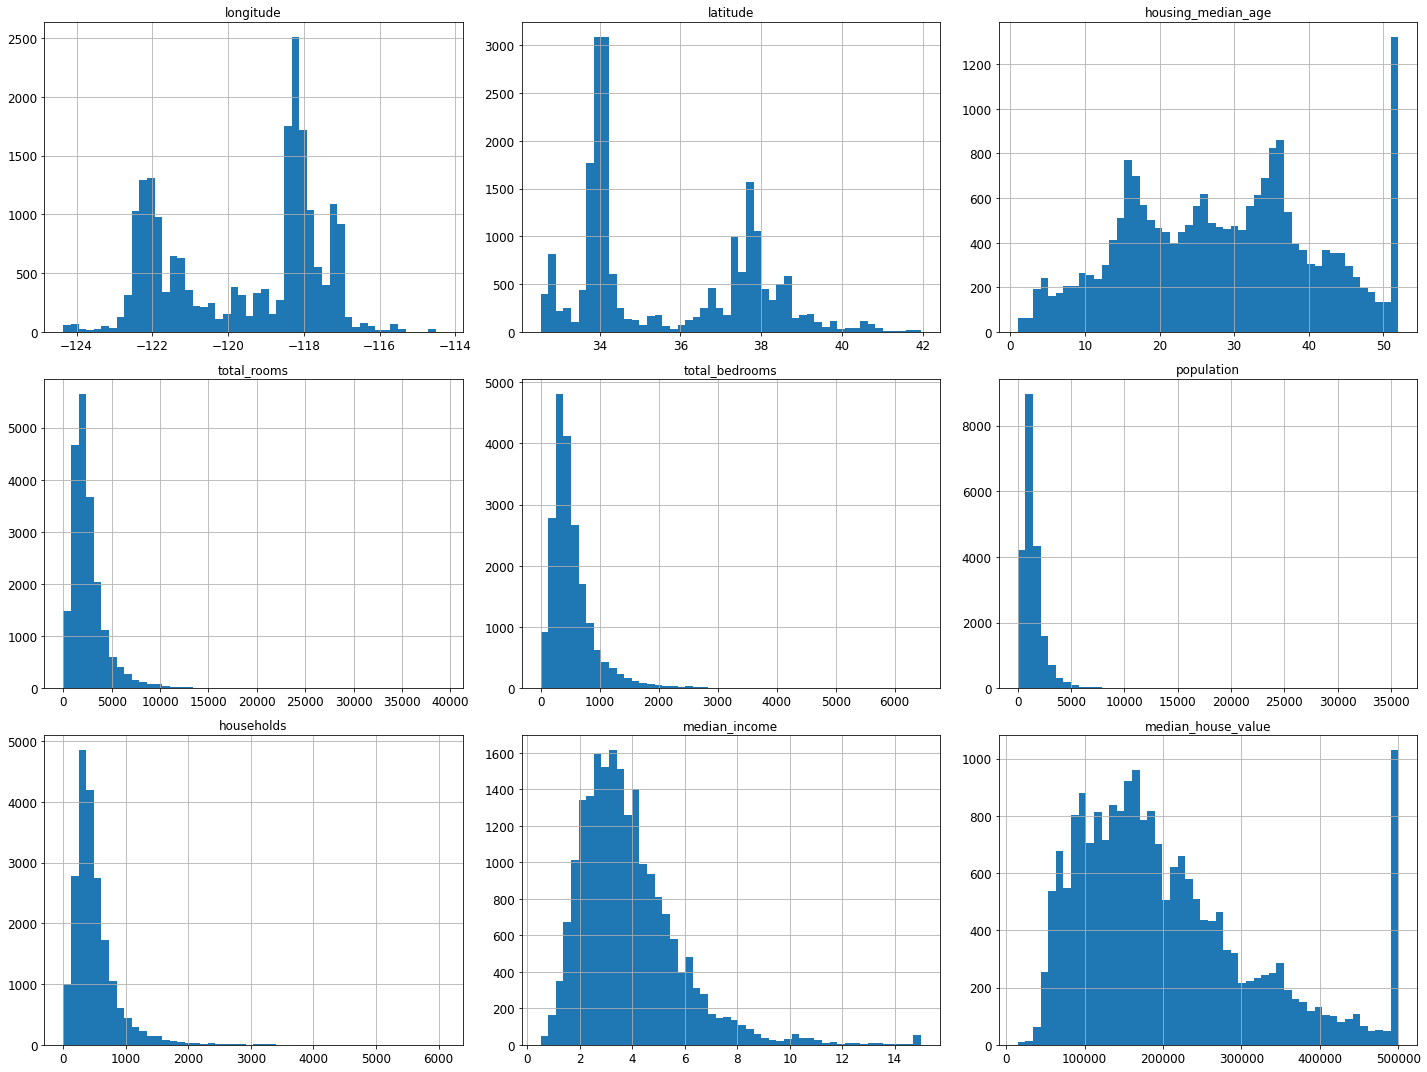

In [8]:
#@ Inspecting the Data using Histograms:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))  
save_fig("Histogram Plots")              
plt.show()                                      # Plotting the Histograms of Numerical Attributes.

**Processing the Data**
* I will create a Test Dataset and set them aside. I will pick 20 percent of the instances randomly.

In [9]:
#@ Splitting the Dataset:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=11)

#@ Inspecting the Dataset:
print(f"Training set: {len(train_set)}")                                             # Number of Training Dataset.
print(f"\nTesting set: {len(test_set)}")                                             # Number of Testing Dataset.
IPython.display.display(train_set.head(3))    
print("\n")                    
IPython.display.display(test_set.head(3))

Training set: 16512

Testing set: 4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20025,-119.05,36.07,21.0,2472.0,523.0,1238.0,504.0,1.7756,62900.0,INLAND
10772,-117.89,33.66,32.0,2736.0,550.0,1279.0,534.0,5.5422,253100.0,<1H OCEAN
16691,-120.61,35.13,16.0,3431.0,721.0,1777.0,701.0,2.7301,190400.0,<1H OCEAN


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2734,-115.56,32.78,34.0,2856.0,555.0,1627.0,522.0,3.2083,76200.0,INLAND
9087,-118.17,34.66,9.0,1561.0,253.0,731.0,233.0,5.7049,173200.0,INLAND
15789,-122.40,37.78,52.0,464.0,202.0,286.0,148.0,1.6125,112500.0,NEAR BAY


**Exploratory Data Analysis**
* I will inspect the median income attribute more closely using Histogram.

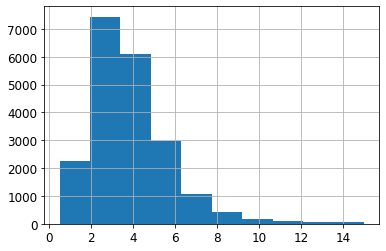

In [10]:
#@ Inspecting the median income attribute:
housing["median_income"].hist()

* By observing the Histogram more closely, the values of median income are clustered around 2 and 6 but some median income values goes beyond 6. I will create an income category attribute with 5 categories which are labeled from 1 to 5. 

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64




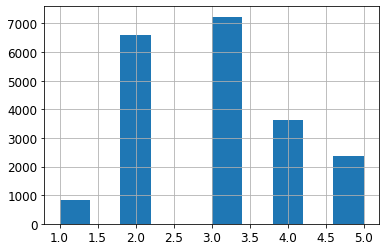

In [11]:
#@ Creating the Income Categories:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

#@ Inspecting the Income Categories:
print(housing["income_cat"].value_counts())
print("\n")
housing["income_cat"].hist()                                      # Inspecting the Income Categories using Histogram.

**Stratified Sampling**
* Now, I will do Stratified Sampling based on the Income Category. I will use Scikit Learn's StratifiedShuffleSplit class for the same. 

In [12]:
#@ Stratified Sampling based on Income Category:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=11)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

#@ Inspecting the Sampling:
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))            # Income Category Proportions in Test set.
print("\n")
print(housing["income_cat"].value_counts() / len(housing))                          # Income Category Proportions in Full Dataset.

#@ Comparing the Proportions:
def income_cat_propotions(data):
  return data["income_cat"].value_counts() / len(data)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=11)     # Splitting the Dataset.
compare_props = pd.DataFrame({
    "Overall": income_cat_propotions(housing),                                      # Full Dataset.
    "Stratified": income_cat_propotions(strat_test_set),                            # Stratified Sampling Dataset.
    "Random": income_cat_propotions(test_set)                                       # Random Smapling Dataset.
}).sort_index()
compare_props["Random % Error"] = 100 * compare_props["Random"] / compare_props["Overall"] -100
compare_props["Stratified % Error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] -100

#@ Inspecting the Proportions:
print("\n")
IPython.display.display(compare_props)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64




,Overall,Stratified,Random,Random % Error,Stratified % Error
1,0.039826,0.039729,0.032946,-17.274939,-0.243309
2,0.318847,0.318798,0.312984,-1.838626,-0.015195
3,0.350581,0.350533,0.353440,0.815368,-0.013820
4,0.176308,0.176357,0.184835,4.836494,0.027480
5,0.114438,0.114583,0.115795,1.185436,0.127011


In [13]:
#@ Removing the Income Cat from the Data:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

### **Exploratory Data Analysis**
* So far, I have only taken the quick glance at the Data to get the general understanding of the Data. Now, the goal is to go little more in the depth. 


**Visualizing the Geographical Data**
* Since, there is a Geographical Information latitude and longitude it will be a good idea to create the scatter plot of all districts to visualize the Data. I will use alpha option to 0.1 which makes it much easier to visualize the places where there is high density of data points.

Saving Figure Geographical Plot


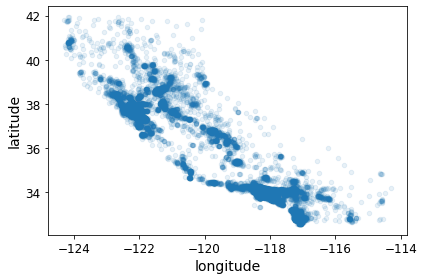

In [14]:
#@ Creating the copy of the Training set:
housing = strat_train_set.copy()

#@ Visualizing the Geographical Data:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("Geographical Plot")

* Now, let's look at the Housing prices. The radius of each circle represents the district's population option s, the color represents the price option c and I will use predefined color map option cmap called jet which ranges from blue low values and red high values. 

Saving Figure Geographical Plots


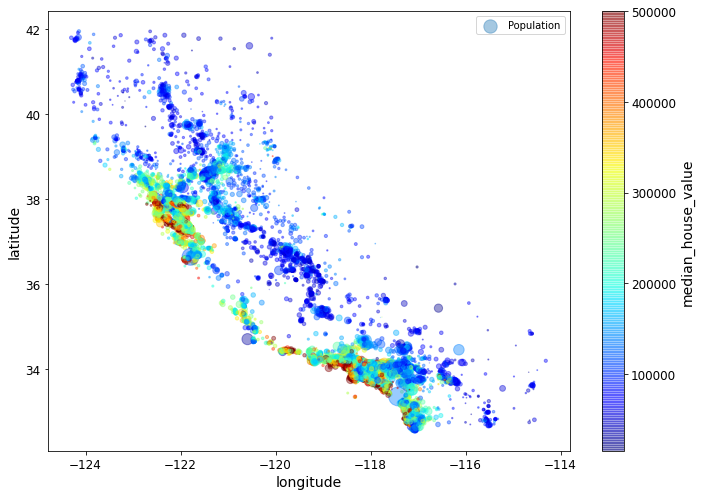

In [15]:
#@ Visualizing the Housing Prices:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="Population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, 
             sharex=False)
plt.legend()
save_fig("Geographical Plots")

* The Image tells that the Housing prices are very much related to the location and to the population density. It will probably be useful to use a clustering algorithm to detect the main clusters and add new features that measures the proximity to the cluster centres. 

**Correlations**
* Now, I will compute the standard correlation coefficient betweeen every pair of the attributes using corr method. 

In [16]:
#@ Correlations:
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))            # Correlations of each attributes with median house value.

median_house_value    1.000000
median_income         0.687819
total_rooms           0.136257
housing_median_age    0.100173
households            0.066018
total_bedrooms        0.050808
population           -0.026287
longitude            -0.042994
latitude             -0.148049
Name: median_house_value, dtype: float64


* Now, I will use Pandas scatter matrix function which plots every numerical attribute to other numerial attribute to check Correlations between attributes. I will focus only on those attributes who are strongly correlated to each other. 

Saving Figure Correlations


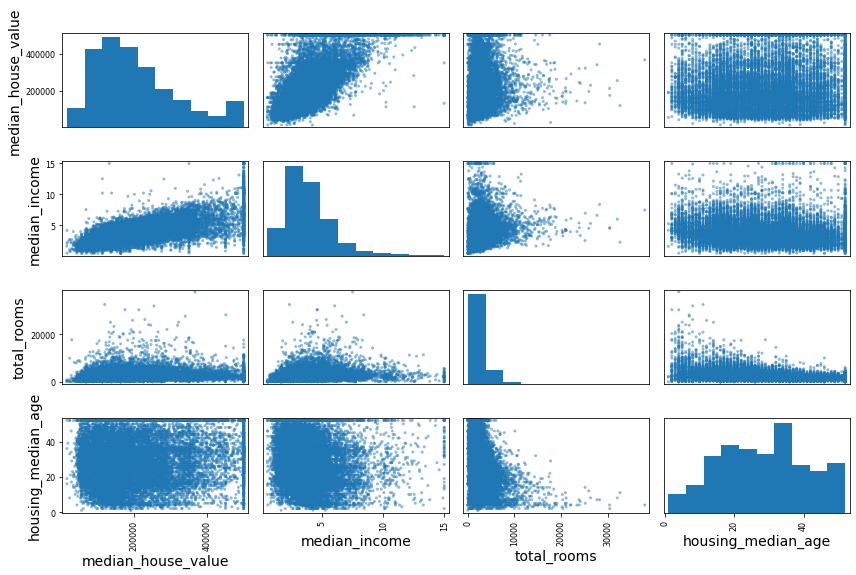

In [17]:
#@ Correlations using Scatter matrix:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("Correlations")

* The plot obtained above presents that the most promising attribute to predict the median house value is the median income. I will inspect the scatter plot of these attributes in more detail. 

Saving Figure Median House value vs Median Income


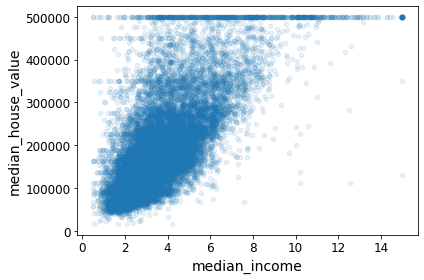

In [18]:
#@ Correlations of Median House Value with Median Income. 
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
save_fig("Median House value vs Median Income")

**Attribute Combinations**
* I will create the number of rooms per household, the total number of bedrooms per rooms and the total number of populations per household.

In [19]:
#@ Attribute Combinations:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]   # Rooms per Household.
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] # Bedrooms per Room.
housing["population_per_household"] = housing["population"]/housing["households"] # Populations per Household.

#@ Inspecting the Correlations:
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

#@ Inspecting the Data:
print("\n")
housing.describe()

median_house_value          1.000000
median_income               0.687819
rooms_per_household         0.172885
total_rooms                 0.136257
housing_median_age          0.100173
households                  0.066018
total_bedrooms              0.050808
population_per_household   -0.022291
population                 -0.026287
longitude                  -0.042994
latitude                   -0.148049
bedrooms_per_room          -0.260035
Name: median_house_value, dtype: float64




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16343.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16343.000000,16512.000000
mean,-119.577933,35.643025,28.624939,2621.313166,534.398030,1419.400254,496.420119,3.869500,206507.410126,5.419345,0.212989,3.111436
std,2.004669,2.141642,12.581716,2147.406404,413.639435,1126.143367,375.014618,1.902174,115368.678905,2.150106,0.057694,11.604933
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.100000,0.750000
25%,-121.800000,33.940000,18.000000,1445.000000,296.000000,792.000000,280.000000,2.561150,119375.000000,4.442941,0.175468,2.429003
50%,-118.500000,34.260000,29.000000,2125.000000,434.000000,1166.000000,409.000000,3.531300,179200.000000,5.227321,0.203227,2.819632
75%,-118.010000,37.720000,37.000000,3136.000000,644.000000,1716.000000,601.000000,4.750000,264525.000000,6.056697,0.239648,3.286105
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,62.422222,1.000000,1243.333333


### **Preparing Data for Machine Learning**

* Now, I will prepare the Data for Machine Learning Algorithms. Firstly, I will revert to a clean training set and separate the predictors and target. The drop method creates the copy of the Data without affecting the Training set. 

In [20]:
#@ Preparing the Data for Machine Learning:
housing = strat_train_set.drop("median_house_value", axis=1)                   # Drop the labels from Training set. 
housing_labels = strat_train_set["median_house_value"].copy()

**Data Cleaning**
* Most of the Machine Learning Algorithms cannot work with missing values. The total bedrooms attribute has some missing values as obtained above in the analysis. Getting rid of missing values can be done in three ways. 
  * Getting rid of the Corresponding districts. 
  * Getting rid of the whole attribute.
  * Setting the values to some value such as median, mean or zero.

In [21]:
#@ Working on missing values:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
IPython.display.display(sample_incomplete_rows)                                             # Inspecting the missing values.
sample_incomplete_rows.dropna(subset=["total_bedrooms"])                                    # Getting rid of corresponding districts. 
sample_incomplete_rows.drop("total_bedrooms", axis=1)                                       # Getting rid of whole attribute. 
median = housing["total_bedrooms"].median()                                                 # Calculating the median.
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)                       # Imputing the median value.
print("\n")
IPython.display.display(sample_incomplete_rows)                                             # Inspecting the Data.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13932,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND
2420,-119.44,36.58,37.0,1054.0,NaN,879.0,257.0,2.5234,INLAND
19332,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000,<1H OCEAN
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,INLAND
15397,-117.20,33.24,12.0,4992.0,NaN,2106.0,801.0,6.2079,<1H OCEAN


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13932,-117.28,34.26,18.0,3895.0,434.0,1086.0,375.0,3.3672,INLAND
2420,-119.44,36.58,37.0,1054.0,434.0,879.0,257.0,2.5234,INLAND
19332,-122.91,38.46,18.0,2021.0,434.0,912.0,329.0,4.5000,<1H OCEAN
1456,-121.98,37.96,22.0,2987.0,434.0,1420.0,540.0,3.6500,INLAND
15397,-117.20,33.24,12.0,4992.0,434.0,2106.0,801.0,6.2079,<1H OCEAN


**Missing Data**
* Scikit Learn provides a handy class to take care of missing values: Simple Imputer. I will create the Imputer instance and replace the missing values with median of the attribute. Since the median can be calculated only on the numerical attributes, I will create the copy of Data without the text attribute ocean proximity. 

In [22]:
#@ Missing Data:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")                               # Instantiating the Imputer.
housing_num = housing.drop("ocean_proximity", axis=1)                    # Removing the Text Attribute.
imputer.fit(housing_num)                                                 # Fitting the Imputer instance to the Training Data.
print(imputer.statistics_)                                               # Inspecting the values.
print(housing_num.median().values)                                       # Inspecting the median values.
X = imputer.transform(housing_num)                                       # Transforming the Training set with trained imputer.
housing_imputed = pd.DataFrame(X, columns=housing_num.columns)           # Creating the DataFrame with numpy arrays.
print("\n")
IPython.display.display(housing_imputed.head())                          # Inspecting the DataFrame. 

[-118.5      34.26     29.     2125.      434.     1166.      409.
    3.5313]
[-118.5      34.26     29.     2125.      434.     1166.      409.
    3.5313]




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.80,33.69,13.0,1161.0,289.0,630.0,296.0,3.3438
1,-121.91,36.85,22.0,2442.0,624.0,1301.0,290.0,3.1563
2,-121.41,38.64,38.0,1384.0,287.0,682.0,280.0,1.9167
3,-118.40,34.25,13.0,1872.0,497.0,1927.0,432.0,2.2019
4,-117.08,32.67,31.0,3008.0,764.0,2088.0,757.0,2.5662


**Handling Text and Categorical Attribute**
* Most of the Machine Learning Algorithms prefer to work with numpy arrays, so I will convert categories from text to numbers. I will use Scikit Learn's Ordinal Encoder Class.

In [23]:
#@ Handling Text and Categorical Attributes:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]] 
print(housing_cat.head())                                                  # Inspecting the Categorical attribute.
ordinal_encoder = OrdinalEncoder()                                         # Instantiating the Encoder.
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)           # Encoding the Text.
IPython.display.display(housing_cat_encoded[:10])                          # Inspecting the Encoded Text.
print("\n")
print(ordinal_encoder.categories_)                                         # Inspecting the list of categories.

      ocean_proximity
10641       <1H OCEAN
18680      NEAR OCEAN
12776          INLAND
3442        <1H OCEAN
14851      NEAR OCEAN


array([[0.],
       [4.],
       [1.],
       [0.],
       [4.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]])



[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


* One issue with this representation is that ML Algorithms assume that the two nearby values are more similar than two distant values. So, I will apply the process of One Hot Encoding. Scikit Learn provides OneHotEncoder class to convert Categorical values into One Hot Vectors. The new attributes are called dummy attributes.

In [24]:
#@ OneHot Encoding:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)                                      # Instantiating the OneHot Encoder class.
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)                    # Encoding the Text.
print(housing_cat_onehot[:10])                                                 # Converting into numpy arrays.
print("\n")
print(cat_encoder.categories_)                                                 # Inspecting the list of categories.

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


**Custom Transformers**
* Now, I will create a custom Transformers to add extra attributes.

In [25]:
#@ Custom Transformers:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
attribute_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)                          # Instantiating the Transformer.
housing_extra_attrs = attribute_adder.transform(housing.values)

#@ Getting the columns indices:
col_names = ["total_rooms", "total_bedrooms", "population", "households"]
rooms_ix, bedrooms_ix, population_ix, households_ix = [
  housing.columns.get_loc(c) for c in col_names
]

#@ Creating the DataFrame:
housing_extra_attrs = pd.DataFrame(
    housing_extra_attrs,
    columns = list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index = housing.index
)
#@ Inspecting the DataFrame:
housing_extra_attrs.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
10641,-117.8,33.69,13,1161,289,630,296,3.3438,<1H OCEAN,3.9223,2.12838
18680,-121.91,36.85,22,2442,624,1301,290,3.1563,NEAR OCEAN,8.42069,4.48621
12776,-121.41,38.64,38,1384,287,682,280,1.9167,INLAND,4.94286,2.43571
3442,-118.4,34.25,13,1872,497,1927,432,2.2019,<1H OCEAN,4.33333,4.46065
14851,-117.08,32.67,31,3008,764,2088,757,2.5662,NEAR OCEAN,3.97358,2.75826
4897,-118.25,34.01,31,1301,403,1952,377,2.1466,<1H OCEAN,3.45093,5.17772
12319,-116.71,33.94,12,549,109,209,90,3.0208,INLAND,6.1,2.32222


**Feature Scaling**
* One of the most important transformations is to apply Feature Scaling to the Data. Machine Learning Algorithms don't perform well with the input numerical attributes having very different scales. The two common ways to get all attributes to have the same scale is Min max Scaling and Standardization.
* Scikit Learn provides Pipeline class to help with the sequence of Transformations. 

In [26]:
#@ Transformation Pipelines:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#@ Pipeline for Numerical attributes:
num_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy="median")),
                         ("attribs_adder", CombinedAttributesAdder()),
                         ("std_scaler", StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
#@ Inspecting the Transformations:
housing_num_tr[:10]

array([[ 0.88692303, -0.91195641, -1.24191428, -0.68005636, -0.59366726,
        -0.70099792, -0.534449  , -0.27637633, -0.69628808, -0.08471288,
         0.53663725],
       [-1.16335311,  0.5635916 , -0.52656888, -0.08350473,  0.22017306,
        -0.105141  , -0.55044886, -0.37495074,  1.39594812,  0.11846795,
         0.63734546],
       [-0.91392779,  1.39942417,  0.74515627, -0.57620702, -0.59852601,
        -0.65482123, -0.5771153 , -1.02664592, -0.221618  , -0.05822887,
        -0.09694691],
       [ 0.58761264, -0.65046689, -1.24191428, -0.34894925, -0.08835745,
         0.45075532, -0.17178549, -0.87670767, -0.50511212,  0.11626547,
         0.789259  ],
       [ 1.24609549, -1.38824089,  0.18877652,  0.18007702,  0.56028544,
         0.59372546,  0.69487364, -0.68518415, -0.67243615, -0.0304345 ,
         0.61388122],
       [ 0.66244024, -0.76253383,  0.18877652, -0.61485946, -0.31671862,
         0.47295566, -0.31845088, -0.90578055, -0.91552532,  0.17805751,
         1.464

* Until now, The Categorical columns and The Numerical columns are handled separately. It would be more convenient to have a single Transformer able to handle all columns, applying the appropriate transformations to each columns. Scikit Learn has ColumnTransformer class for this purpose. I will apply all the Transformations to the Housing Data using ColumnTransformer. 

In [27]:
#@ Implementation of ColumnTransformer:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)                          # List of numerical attributes.
cat_attribs = ["ocean_proximity"]                        # List of categorical attributes. 
pipeline = ColumnTransformer([
                              ("num", num_pipeline, num_attribs),
                              ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared = pipeline.fit_transform(housing)

#@ Inspecting the Transformers:
print(housing_prepared[:10])
print(housing_prepared.shape)

[[ 0.88692303 -0.91195641 -1.24191428 -0.68005636 -0.59366726 -0.70099792
  -0.534449   -0.27637633 -0.69628808 -0.08471288  0.53663725  1.
   0.          0.          0.          0.        ]
 [-1.16335311  0.5635916  -0.52656888 -0.08350473  0.22017306 -0.105141
  -0.55044886 -0.37495074  1.39594812  0.11846795  0.63734546  0.
   0.          0.          0.          1.        ]
 [-0.91392779  1.39942417  0.74515627 -0.57620702 -0.59852601 -0.65482123
  -0.5771153  -1.02664592 -0.221618   -0.05822887 -0.09694691  0.
   1.          0.          0.          0.        ]
 [ 0.58761264 -0.65046689 -1.24191428 -0.34894925 -0.08835745  0.45075532
  -0.17178549 -0.87670767 -0.50511212  0.11626547  0.789259    1.
   0.          0.          0.          0.        ]
 [ 1.24609549 -1.38824089  0.18877652  0.18007702  0.56028544  0.59372546
   0.69487364 -0.68518415 -0.67243615 -0.0304345   0.61388122  0.
   0.          0.          0.          1.        ]
 [ 0.66244024 -0.76253383  0.18877652 -0.614859

### **Training the Model**
* Now, I will train the Machine Learning Model.

In [28]:
#@ Training the Model:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()                                              # Instantiating the Model. 
lin_reg.fit(housing_prepared, housing_labels)                             # Training the Linear Model.

#@ Inspecting the Model on few Instances:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_prepared = pipeline.transform(some_data)
print(f"Predictions: {lin_reg.predict(some_prepared)}")                   # Inspecting the Predictions.
print(f"Labels: {list(some_labels)}")

#@ Inspecting the Errors:
print("\n")
from sklearn.metrics import mean_squared_error, mean_absolute_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)                                                            # Inspecting the root mean squared error.
lin_mae = mean_absolute_error(housing_labels, housing_predictions) 
print(lin_mae)                                                             # Inspecting the mean absolute error.

Predictions: [188446.87674932 217822.72225147  83876.69336975 116932.35842273
 195090.38923287]
Labels: [333300.0, 300000.0, 64400.0, 134200.0, 118200.0]


68376.58316280936
49337.35060481577


**Decision Trees**
* The score obtained above is not the best score. It is an example of Model underfitting the Training Data which means that the features don't provide enough information to make good predictions or that the Model is not powerful enough. The main ways to fix underfitting is to select more powerful Model or to feed the Training Algorithms with better features. Firstly, I will train the Model with Decision Trees which is more powerful Model.

In [29]:
#@ Implementation of Decision Trees:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=11)                      # Instantiating the Model.
tree_reg.fit(housing_prepared, housing_labels)                         # Training the Model. 
housing_predictions = tree_reg.predict(housing_prepared)               # Making predictions.
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)                                                       # Root mean squared error.

0.0


* As the result obtained above, there is no error at all. It is more likely that the Model has badly overfit the Data. I will use part of Training set for Training and part for Model Validation. 

**Cross Validation**
* I will use Scikit Learn's Cross Validation for Evaluating the Model. The result obtained is an array of a number of Evaluation scores. Scikit Learn's Cross Validation features expect a utility function greater is better rather than a cost function lower is better. So the scoring fucntion is actually the opposite of MSE which is a negative value. I will use minus sign before calculating the square root of scores.

In [30]:
#@ Implementation of Cross Validation with Decision Trees:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

#@ Inspecting the Result:
def display_scores(scores):
  print(f"Scores: {scores}")
  print(f"Mean: {scores.mean()}")
  print(f"Standard Deviation: {scores.std()}")
display_scores(tree_rmse_scores)                                                   # Inspecting the scores.

#@ Implementation of Cross Validation with Linear Regression:
print("\n")
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)                                                    # Inspecting the scores. 

Scores: [68464.55752138 69690.9609981  68004.17300349 73051.18946449
 70316.54492485 74434.78497541 66650.7160466  71101.89208675
 67728.25960442 72953.62410336]
Mean: 70239.67027288451
Standard Deviation: 2474.991722588162


Scores: [67946.34706551 72043.62662071 66935.91382681 69505.87156287
 70581.05232874 70161.98711779 65314.14210918 70476.91199502
 66917.30707745 67533.8165875 ]
Mean: 68741.69762915772
Standard Deviation: 2008.159996178294


* From the result obtained above, Decision Tree Model is overfitting so badly and it's performance is comparable to the Linear Regression Model. 

**RandomForest Regressor**
* Random Forests work by training many Decision Trees on random subset of the features and then averaging out the predictions. Building a model on top of many other models is called Ensemble Learning and it is often a great way to push Machine Learning Algorithms even further. 

In [32]:
#@ Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=160, min_samples_leaf=3,                            # Instantiating the Model.
                                   n_jobs=-1, random_state=11)
forest_reg.fit(housing_prepared, housing_labels)                                                    # Training the Model.
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)                                # Calculating mean squared error. 
forest_rmse = np.sqrt(forest_mse)                                                                   # Calculating root mean squard error. 
print(forest_rmse)
print("\n")
#@ Random Forest Regressor with Cross Validation:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,                       # Random Forest with Cross Validation.
                                scoring="neg_mean_squared_error", cv=10)
forest_scores_rmse = np.sqrt(-forest_scores)
display_scores(forest_scores_rmse)                                                                  # Inspecting the scores.

27669.360463712765


Scores: [48846.19835981 51112.85436327 49499.53377395 51424.72209762
 50774.76151902 51919.31575877 47324.20338154 50141.00300135
 48617.28070001 49747.04559718]
Mean: 49940.691855252546
Standard Deviation: 1351.0930527812056


* Random Forest looks much more promising Model !!

In [34]:
#@ Saving the Random Forest Model:
from sklearn.externals import joblib
joblib.dump(forest_reg, "ForestModel.pkl")

['ForestModel.pkl']

**Grid Search and Tuning the Model**
* I will use Scikit Learn's Grid Search to find the great combinations of hyperparameters values. It will evaluate all possible combinations of hyperparameters values using Cross Validation.

In [36]:
#@ Grid Search and Tuning the Model:
from sklearn.model_selection import GridSearchCV
param_grid = [
              {"n_estimators":[30, 60, 90, 120], "max_features":[2, 3, 4]},
              {"bootstrap":[False], "n_estimators":[90, 120], "max_features":[2, 3, 4]}]
forest_reg = RandomForestRegressor(random_state=11)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error", 
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

#@ Inspecting the Result:
print(grid_search.best_params_)
print("\n")
print(grid_search.best_estimator_)
print("\n")

#@ Inspecting the Scores:
cvresults = grid_search.cv_results_
for mean_score, params in zip(cvresults["mean_test_score"], cvresults["params"]):
  print(np.sqrt(-mean_score), params)
print("\n")
IPython.display.display(pd.DataFrame(grid_search.cv_results_))

{'bootstrap': False, 'max_features': 4, 'n_estimators': 120}


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)


52647.18598653378 {'max_features': 2, 'n_estimators': 30}
51983.719956840825 {'max_features': 2, 'n_estimators': 60}
51649.46445435719 {'max_features': 2, 'n_estimators': 90}
51498.522509685485 {'max_features': 2, 'n_estimators': 120}
50917.81072178314 {'max_features': 3, 'n_estimators': 30}
50521.4565970279 {'max_features': 3, 'n_estimators': 60}
50236.35697654476 {'max_features': 3, 'n_estimators': 90}
50067.17174221468 {'max_features': 3

**Randomized Search**
* The Grid Search Approach is fine when there is relatively few combinations. When the hyperparamters search space is large it is preferable to use Randomized Search. It evaluates the given number of random combinations by selecting a random value for each hyperparameter at every iteration. 

In [38]:
#@ Implementation of Randomized Search CV:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=10),
    "min_samples_leaf": randint(low=1, high=8)
}
forest_reg = RandomForestRegressor(random_state=11)
random_search = RandomizedSearchCV(forest_reg, param_distribs, cv=5,
                                   n_iter=10, scoring="neg_mean_squared_error", random_state=11)
random_search.fit(housing_prepared, housing_labels)

#@ Inspecting the Result:
print(random_search.best_params_)
print("\n")
print(random_search.best_estimator_)
print("\n")

#@ Inspecting the Scores:
cvresults = random_search.cv_results_
for mean_score, params in zip(cvresults["mean_test_score"], cvresults["params"]):
  print(np.sqrt(-mean_score), params)
print("\n")
IPython.display.display(pd.DataFrame(random_search.cv_results_))

{'max_features': 9, 'min_samples_leaf': 1, 'n_estimators': 146}


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=9, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=146, n_jobs=None, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)


62113.601621035166 {'max_features': 1, 'min_samples_leaf': 4, 'n_estimators': 82}
50302.40108738755 {'max_features': 8, 'min_samples_leaf': 6, 'n_estimators': 77}
53899.903789261196 {'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 25}
64256.52599128238 {'max_features': 1, 'min_samples_leaf': 6, 'n_estimators': 161}
49543.66435147354 {'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 141}
53381.86725394772 {'max_features'

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.723207,0.018746,0.037564,0.001374,1,4,82,"{'max_features': 1, 'min_samples_leaf': 4, 'n_...",-3.850637e+09,-3.736841e+09,-4.018709e+09,-3.851229e+09,-3.833081e+09,-3.858100e+09,9.080495e+07,9
1,3.435737,0.028033,0.039028,0.003577,8,6,77,"{'max_features': 8, 'min_samples_leaf': 6, 'n_...",-2.475141e+09,-2.599661e+09,-2.720803e+09,-2.441684e+09,-2.414369e+09,-2.530332e+09,1.144009e+08,4
2,0.390685,0.004131,0.014740,0.000319,2,3,25,"{'max_features': 2, 'min_samples_leaf': 3, 'n_...",-2.842029e+09,-3.009596e+09,-2.970992e+09,-2.902153e+09,-2.801228e+09,-2.905200e+09,7.750776e+07,8
3,1.274546,0.019919,0.062898,0.001500,1,6,161,"{'max_features': 1, 'min_samples_leaf': 6, 'n_...",-4.005973e+09,-4.225264e+09,-4.227979e+09,-4.138762e+09,-4.046528e+09,-4.128901e+09,9.065993e+07,10
4,4.636031,0.051125,0.084686,0.004948,5,3,141,"{'max_features': 5, 'min_samples_leaf': 3, 'n_...",-2.387478e+09,-2.546320e+09,-2.599984e+09,-2.380766e+09,-2.358325e+09,-2.454575e+09,9.876685e+07,2
5,0.595039,0.007981,0.022767,0.001249,2,3,38,"{'max_features': 2, 'min_samples_leaf': 3, 'n_...",-2.766424e+09,-2.934014e+09,-2.942147e+09,-2.823892e+09,-2.781643e+09,-2.849624e+09,7.468328e+07,7
6,2.926774,0.021707,0.041309,0.000581,6,5,82,"{'max_features': 6, 'min_samples_leaf': 5, 'n_...",-2.463404e+09,-2.560023e+09,-2.647097e+09,-2.442657e+09,-2.376247e+09,-2.497886e+09,9.503709e+07,3
7,9.913892,0.084997,0.137402,0.003016,9,1,146,"{'max_features': 9, 'min_samples_leaf': 1, 'n_...",-2.387666e+09,-2.547765e+09,-2.595743e+09,-2.352564e+09,-2.358474e+09,-2.448442e+09,1.025116e+08,1
8,4.084183,0.030570,0.080154,0.001068,4,7,172,"{'max_features': 4, 'min_samples_leaf': 7, 'n_...",-2.578386e+09,-2.705356e+09,-2.762649e+09,-2.580860e+09,-2.515580e+09,-2.628566e+09,9.103274e+07,6
9,4.146505,0.023121,0.112007,0.001657,3,3,193,"{'max_features': 3, 'min_samples_leaf': 3, 'n_...",-2.507427e+09,-2.668101e+09,-2.678865e+09,-2.535825e+09,-2.472604e+09,-2.572564e+09,8.486672e+07,5


**Analyzing the Best Models**

In [39]:
#@ Analyzing the Best Models and Errors:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = pipeline.named_transformers_["cat"]
cat_onehot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_onehot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.27097713732926215, 'median_income'),
 (0.13124673076809507, 'INLAND'),
 (0.10371089641458281, 'population_per_household'),
 (0.0904329189429626, 'longitude'),
 (0.0893627545645655, 'bedrooms_per_room'),
 (0.0817695500573566, 'latitude'),
 (0.0716429098276723, 'rooms_per_household'),
 (0.04098485612211728, 'housing_median_age'),
 (0.02431254956610928, 'total_rooms'),
 (0.02240959196114921, 'population'),
 (0.0194121513284739, 'households'),
 (0.019242304716008664, 'total_bedrooms'),
 (0.01910206228086364, '<1H OCEAN'),
 (0.008334530522205928, 'NEAR OCEAN'),
 (0.006769557370065242, 'NEAR BAY'),
 (0.00028949822850994134, 'ISLAND')]

* From the result obtained above, I will drop some less useful attributes i.e ocean proximity. 

**Evaluating the System on Testset**


In [40]:
#@ Evaluating the System on Testset:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
#@ Preparing the Data:
X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
#@ Evaluating the Model:
final_mse = mean_squared_error(y_test, final_predictions)              # Calculating the mean squared error. 
final_rmse = np.sqrt(final_mse)                                        # Calculating the root mean squared error.
print(final_rmse)

47466.442514815506


In [41]:
#@ Computing a 95% confidence interval:
from scipy import stats
confidence = 0.95
squared_error = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_error)-1, loc=squared_error.mean(),
                         scale=stats.sem(squared_error)))

array([45188.48103843, 49639.97896317])

**Launch, monitor and maintain the System !!**